In [205]:
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [206]:
import os

os.chdir('/content/drive/MyDrive/Qtaim_residuos')

# Obtener la ruta de la carpeta actual
ruta_actual = os.getcwd()

# Reemplazar parte de la ruta con la nueva carpeta
carpeta_nueva = "nueva_carpeta"
ruta_nueva = ruta_actual.replace("carpeta_actual", carpeta_nueva)

# Cambiar el directorio actual a la nueva ruta
os.chdir(ruta_nueva)

In [207]:
def process_dataframe(df,Lig):
  # Iterar sobre las filas del DataFrame
  for index, row in df.iterrows():
      j = row[3]
      k = row[9]
      if j == k:
          # Eliminar la fila que cumple la condición
          df = df.drop(index)

  # Restablecer los índices del DataFrame después de eliminar las filas
  df = df.reset_index(drop=True)

  column_names = ['Col0', 'Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10', 'Col11', 'Col12', 'Col13']
  rearange_df = pd.DataFrame(columns=column_names)

  for i in range(len(df[0])):
      j = df.iloc[i, 3]
      if j == Lig:
          col0 = df.iloc[i, 6]
          col1 = df.iloc[i, 7]
          col2 = df.iloc[i, 8]
          col3 = df.iloc[i, 9]
          col4 = df.iloc[i, 10]
          col5 = df.iloc[i, 5]
          col6 = df.iloc[i, 0]
          col7 = df.iloc[i, 1]
          col8 = df.iloc[i, 2]
          col9 = df.iloc[i, 3]
          col10 = df.iloc[i, 4]
          col11 = df.iloc[i, 11]
          col12 = df.iloc[i, 12]
          col13 = df.iloc[i, 13]

          row = [col0, col1, col2, col3, col4, col5, col6, col7, col8, col9, col10, col11, col12, col13]
          rearange_df.loc[len(rearange_df)] = row
      else:
          col0 = df.iloc[i, 0]
          col1 = df.iloc[i, 1]
          col2 = df.iloc[i, 2]
          col3 = df.iloc[i, 3]
          col4 = df.iloc[i, 4]
          col5 = df.iloc[i, 5]
          col6 = df.iloc[i, 6]
          col7 = df.iloc[i, 7]
          col8 = df.iloc[i, 8]
          col9 = df.iloc[i, 9]
          col10 = df.iloc[i, 10]
          col11 = df.iloc[i, 11]
          col12 = df.iloc[i, 12]
          col13 = df.iloc[i, 13]
          row = [col0, col1, col2, col3, col4, col5, col6, col7, col8, col9, col10, col11, col12, col13]
          rearange_df.loc[len(rearange_df)] = row

  rearange_df.reset_index(drop=True, inplace=True)
  df2 = rearange_df.drop("Col5", axis=1)
  # Verificar duplicados en todas las columnas
  duplicates = df2.duplicated()

  # Obtener índices de filas duplicadas
  duplicate_indices = df2[duplicates].index

  # Eliminar filas duplicadas
  df2 = df2.drop(duplicate_indices)

  # Restablecer los índices del DataFrame después de eliminar las filas duplicadas
  df2 = df2.reset_index(drop=True)
  return df2

In [208]:
import pandas as pd

In [209]:
nombre_archivo = 'CPsInfo_9MT.txt'

# Dividir el nombre del archivo usando el carácter '_'
split_nombre = nombre_archivo.split('_')
split_nombre = split_nombre[1]
split_nombre = split_nombre.split(".")
# Seleccionar el elemento después del '_' y antes de '.txt'
name_file = split_nombre[0]

print(name_file)

9MT


In [210]:
# Leer el archivo en un DataFrame de pandas
df = pd.read_csv(nombre_archivo, delimiter='\t', header=None)
df2=process_dataframe(df,"M9T") #cambiar nombre Lig
df2.head()

,Col0,Col1,Col2,Col3,Col4,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13
0,44,C,350,ARG,193,105,O,387,M9T,309,0.005620,0.022620,0.027955
1,61,H,342,ALA,192,107,H,419,M9T,309,0.001622,0.005413,0.007540
2,54,H,341,ALA,192,131,H,423,M9T,309,0.001132,0.003746,0.004732
3,61,H,342,ALA,192,154,H,416,M9T,309,0.001417,0.004569,0.005976
4,93,H,38,GLY,43,135,H,420,M9T,309,0.009578,0.035190,0.056533


In [211]:
def interactions_detector(df):
  import seaborn as sns
  import matplotlib.pyplot as plt

  heatmap_data = []

  for i in range(len(df)):
      interaction1 = str(df.iloc[i, 2]) + " " + str(df.iloc[i, 1]) + " " + str(df.iloc[i, 3]) + str(df.iloc[i, 4])
      interaction2 = str(df.iloc[i, 5]) + " " + str(df.iloc[i, 6])
      rho = str(df.iloc[i, 11])
      heatmap_data.append([interaction1, interaction2,rho])

  heatmap_df = pd.DataFrame(heatmap_data, columns=['Interaction1', 'Interaction2','rho'])
  return(heatmap_df)

In [212]:
heatmap_df=interactions_detector(df2)
heatmap_df

,Interaction1,Interaction2,rho
0,350 C ARG193,105 O,0.02262
1,342 H ALA192,107 H,0.005413
2,341 H ALA192,131 H,0.003746
3,342 H ALA192,154 H,0.004569
4,38 H GLY43,135 H,0.03519
5,322 H PHE189,131 H,0.02223
6,362 N ARG193,160 H,0.012092
7,64 H VAL50,181 O,0.040588
8,56 H VAL50,163 H,0.031875
9,33 O LEU42,135 H,0.018549


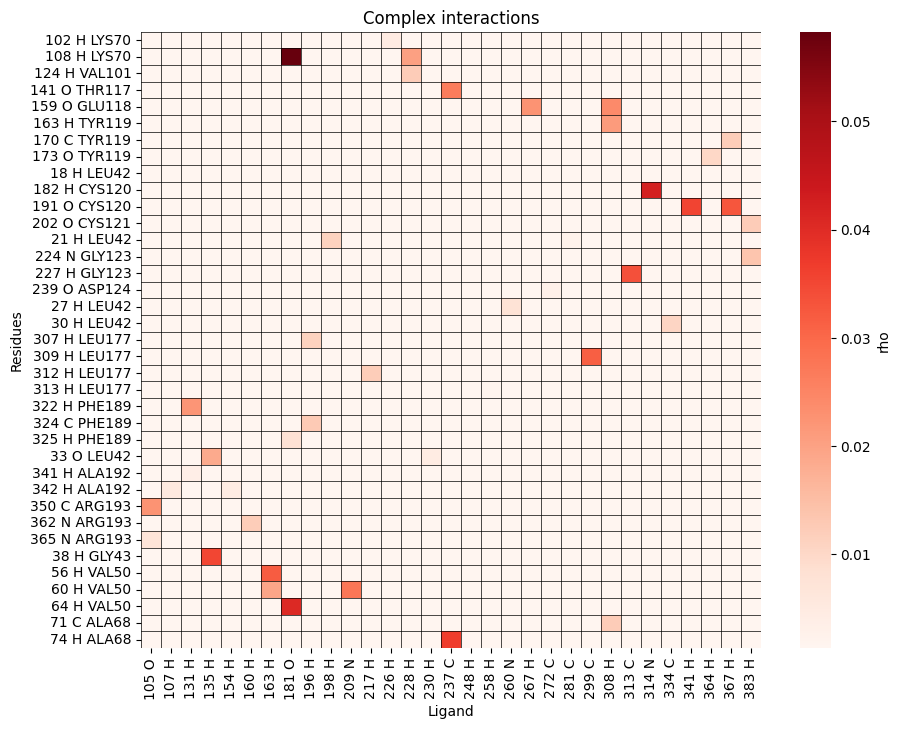

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir la columna 'rho' a tipo numérico
heatmap_df['rho'] = pd.to_numeric(heatmap_df['rho'], errors='coerce')

# Crear matriz de valores de rho para pares de interacciones
heatmap_matrix = heatmap_df.pivot_table(index='Interaction1', columns='Interaction2', values='rho').fillna(0)

# Crear heatmap con la escala de color basada en 'rho'
plt.figure(figsize=(10, 8))
ax = sns.heatmap(heatmap_matrix, cmap="Reds", cbar=True, vmin=heatmap_df['rho'].min(), vmax=heatmap_df['rho'].max(), cbar_kws={'label': 'rho'})
plt.title('Complex interactions')
plt.xlabel('Ligand')
plt.ylabel('Residues')

# Rotar el texto del label del eje x a 90 grados
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Agregar líneas verticales y horizontales
for i in range(len(heatmap_matrix)):
    ax.axhline(i, color='black', lw=0.5)
    ax.axvline(i, color='black', lw=0.5)

# Guardar la imagen recortada como PDF
plt.savefig('heatmap_QTAIM_rho_residues_'+name_file+'.pdf', format='pdf', bbox_inches='tight')

# Mostrar el gráfico en pantalla
plt.show()